In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_absolute_error,r2_score

In [2]:
A = pd.read_csv("C:/Users/akaks/Downloads/diamond.csv")

In [3]:
A

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Dropping Unnecessary columns

In [4]:
A.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
A

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Checking for correlation

In [6]:
A.corr()['price'].sort_values(ascending=False)

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

In [7]:
# x,y,z columns are having very correlation with the target variable
# while the feature depth is having very bad correlation with target variable so we will drop this feature

In [8]:
A.drop('depth',axis=1,inplace=True)

In [9]:
A

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,58.0,2757,6.15,6.12,3.74


C:\Users\akaks\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


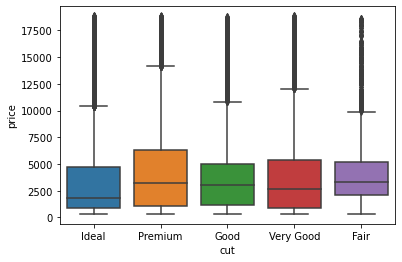

C:\Users\akaks\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


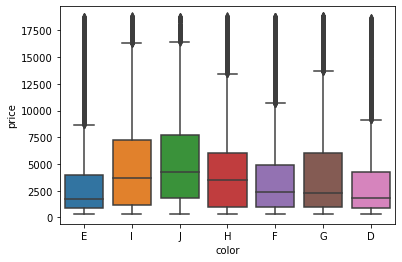

C:\Users\akaks\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


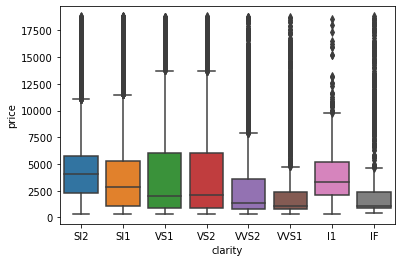

In [10]:
for i in A.columns:
    if A[i].dtype=="O":
        sb.boxplot(A[i],A['price'])
        plt.show()

In [11]:
# fro above boxplots we can say that all the categorical features are having good relation with the target variable 
# so we will keep all the variables
# also as we can see there are many outliers in the data

In [12]:
A.describe()

,carat,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Checking for null values

In [13]:
A.isna().sum()

carat      0
cut        0
color      0
clarity    0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [14]:
# no null values are there in all the features

# Bivsriate analysis using pairplot

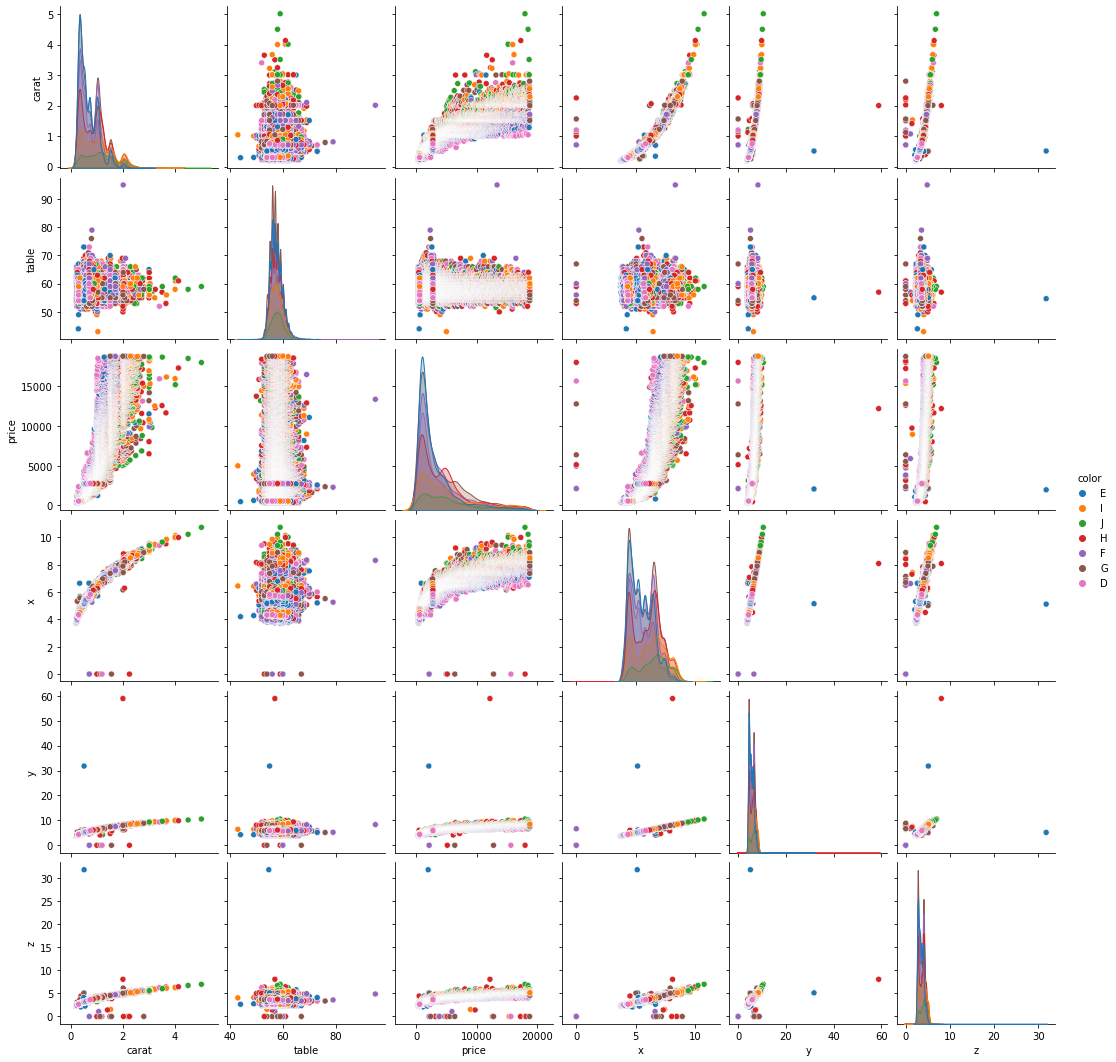

In [15]:
sb.pairplot(A,hue='color')

In [16]:
# Features are having datapoints that are far from the rest of the dataset (outliers)
# which needs to be dealth with or else would affect our model.
# "y" and "z" have some dimensional outliers in our dataset that needs to be eliminated

# Checking for potential outliers

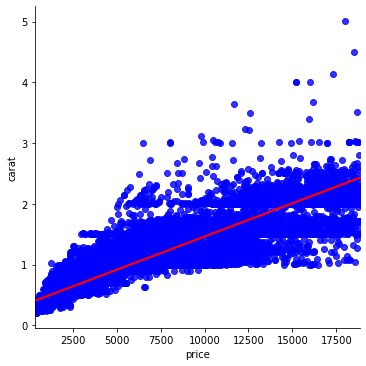

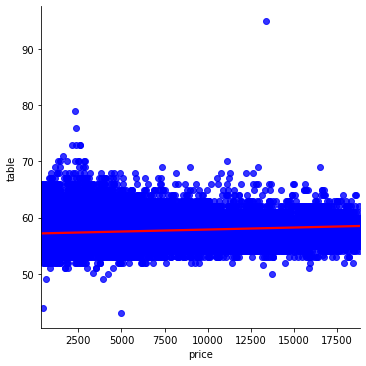

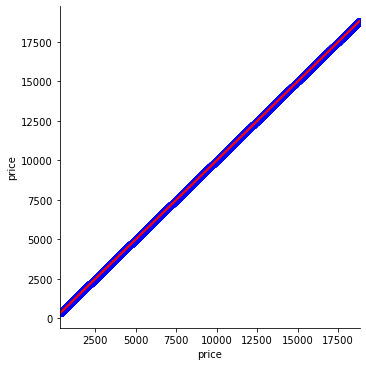

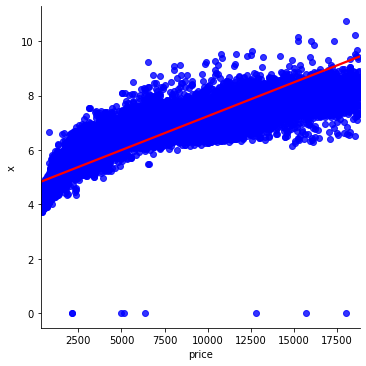

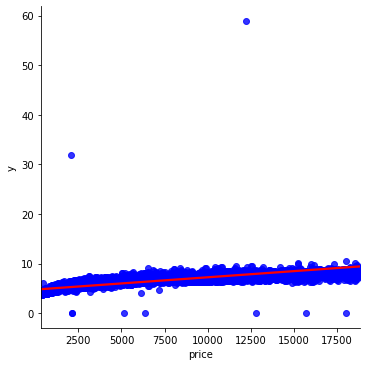

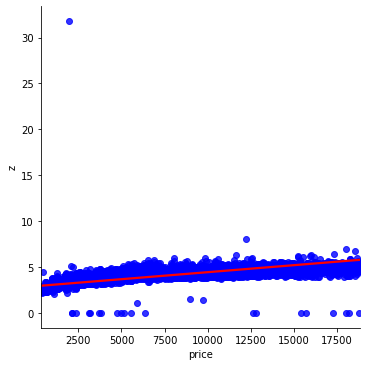

In [17]:
for i in A.columns:
    if A[i].dtype!="O":
        sb.lmplot(x='price',y=i,data=A,scatter_kws={'color':'b'},line_kws={'color':'r'})
        #plt.title("line plot on Price vs",i)
        plt.show()

In [18]:
# Removing datapoints in X,y,z having value 0

In [19]:
A = A.drop(A[A.x==0].index)
A = A.drop(A[A.y==0].index)
A = A.drop(A[A.z==0].index)

In [20]:
A.shape

(53920, 9)

# Remmoving Outliers

In [21]:
A = A[(A.carat<4)]
A = A[(A.z<30) & (A.z > 2)]
A = A[(A.y < 30)]
A = A[(A.table < 90) & (A.table > 45)]

In [22]:
A.shape

(53905, 9)

# Encoding categorical variables

In [23]:
A.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75


In [24]:
cat = []
for i in A.columns:
    if A[i].dtype=="O":
        cat.append(i)

In [25]:
cat

['cut', 'color', 'clarity']

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    A[i] = le.fit_transform(A[i])

In [27]:
A

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,2,1,3,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,58.0,2757,6.15,6.12,3.74


In [28]:
A.corr()['price']

carat      0.922263
cut        0.040450
color      0.171909
clarity   -0.070748
table      0.126653
price      1.000000
x          0.887075
y          0.888672
z          0.882442
Name: price, dtype: float64

In [29]:
# here feature like x,y,z are highly correlated with target variable 
# features like cut,clarity and table have less correlation. but as we have less features we will not drop these feature

# Model Building

In [30]:
X = A.drop('price',axis=1)
Y = A[['price']]

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=21)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
pip_lr = Pipeline([('Scalar',StandardScaler()),('lr',LinearRegression())])
pip_lasso = Pipeline([('Scalar',StandardScaler()),('ls',Lasso())])
pip_ridge = Pipeline([('Scalar',StandardScaler()),('rd',Ridge())])
pip_dtc = Pipeline([('Scalar',StandardScaler()),('dtc',DecisionTreeRegressor())])
pip_rfc = Pipeline([('Scalar',StandardScaler()),('rfc',RandomForestRegressor())])
pip_ada = Pipeline([('Scalar',StandardScaler()),('ada',AdaBoostRegressor())])
pip_KNR = Pipeline([('Scalar',StandardScaler()),('KNR',KNeighborsRegressor())])

In [34]:
Pipelines = [pip_lr,pip_dtc,pip_ada,pip_lasso,pip_rfc,pip_ridge,pip_KNR]

In [35]:
pipeline_dict = {0:'LinearRegression',1:'Lasso',2:'Ridge',3:'DecisionTreeRegressor',
                 4:'RandomForestRegressor',5:'AdaBoostRegressor',6:'KNeighborsRegressor'}

In [36]:
for pipe in Pipelines:
    pipe.fit(xtrain,ytrain)

C:\Users\akaks\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\akaks\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3768509698.686058, tolerance: 68486570.23290737
  model = cd_fast.enet_coordinate_descent(
C:\Users\akaks\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [37]:
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
cv_results_rms = []
for i, model in enumerate(Pipelines):
    cv_score = cross_val_score(model, xtrain,ytrain,scoring="neg_root_mean_squared_error", cv=4)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 1330.588008 
Lasso: 761.099649 
Ridge: 1298.722726 
DecisionTreeRegressor: 1331.341669 
RandomForestRegressor: 554.519105 
AdaBoostRegressor: 1330.581043 
KNeighborsRegressor: 749.169677 


In [42]:
# Model prediction on test data with RandomForestRegressor which gave us the least RMSE 
from sklearn import metrics
pred = pip_rfc.predict(xtest)
print("R^2:",metrics.r2_score(ytest, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(ytest, pred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))

R^2: 0.9805746195394324
Adjusted R^2: 0.9805601929664947


In [43]:
#Great!!! we got 98.05% accuracy.